In [1]:
# Bayesian statistics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from urllib.request import urlopen

In [3]:
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_bayes/'
inFile = 'challenger_data.csv'
url = url_base + inFile
challenger_data = np.genfromtxt(urlopen(url), skip_header=1, usecols=[1, 2],
                                missing_values='NA', delimiter=',')
# drop the NA values
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]

# plot it, as a function of tempature (the first column)
print("Temp (F), O-Ring failure?")
print(challenger_data)

Temp (F), O-Ring failure?
[[66.  0.]
 [70.  1.]
 [69.  0.]
 [68.  0.]
 [67.  0.]
 [72.  0.]
 [73.  0.]
 [70.  0.]
 [57.  1.]
 [63.  1.]
 [70.  1.]
 [78.  0.]
 [67.  0.]
 [53.  1.]
 [67.  0.]
 [75.  0.]
 [70.  0.]
 [81.  0.]
 [76.  0.]
 [79.  0.]
 [75.  1.]
 [76.  0.]
 [58.  1.]]


Text(0.5,1,'Defects of the Space Shuttle O-Rings vs temperature')

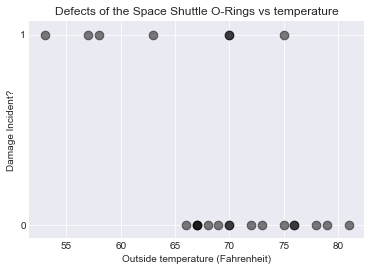

In [4]:
%matplotlib inline
sns.set_style('darkgrid')
np.set_printoptions(precision=3, suppress=True)

plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, color="k",
            alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Damage Incident?")
plt.xlabel("Outside temperature (Fahrenheit)")
plt.title("Defects of the Space Shuttle O-Rings vs temperature")

It looks clear that the probability of damage incidents occurring increases as the outside temperature decreases. We are interested in modeling the probability here because it does not look like there is a strict cutoff point between temperature and a damage incident occurring. The best we can do is ask "At temperature t, what is the probability of a damage incident?". The goal of this example is to answer that question.

We need a function of temperature, call it p(t), that is bounded between 0 and 1 (so as to model a probability) and changes from 1 to 0 as we increase temperature. There are actually many such functions, but the most popular choice is the logistic function.
$$p(t) = \frac{1}{ 1 + e^{ \;\beta t + \alpha } } $$

In this model, the variable $\beta$ that describes how quickly the function changes from 1 to 0, and $\alpha$ indicates the location of this change. For example


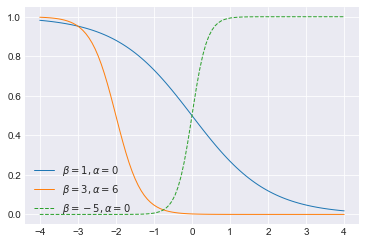

In [5]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

plt.plot(x, logistic(x, 1), label=r"$\beta = 1, \alpha = 0$", ls="-", lw=1)
plt.plot(x, logistic(x, 3, 6), label=r"$\beta = 3, \alpha = 6$", ls="-", lw=1)
plt.plot(x, logistic(x, -5), label=r"$\beta = -5, \alpha = 0$", ls="--", lw=1)

plt.legend(loc='lower left')

In [6]:
import pymc as pm

ImportError: No module named 'pymc'

In [ ]:
# https://github.com/thomas-haslwanter/statsintro_python/blob/master/ipynb/14_BayesianStatistics.ipynb